<a href="https://colab.research.google.com/github/SohyunKimmm/SohyunKimmm/blob/main/230103_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#R-square(설명력): 1=설명력100, 0=설명력0
#-> y관측값이 y평균값보다 얼마나 더 관계를 잘 설명하는가

##230103_복습

In [1]:
from matplotlib import pyplot as plt
from pandas import DataFrame #DataFrame: 엑셀형태
import numpy as np
from pandas import *

In [2]:
import pandas as pd
sp_sales = pd.read_csv("/content/drive/MyDrive/230103_Ashopping.csv", encoding = "cp949")
sp_sales

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [3]:
#한글파일 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

BP(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3066641f0>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7fe306635e50>, <matplotlib.lines.Line2D object at 0x7fe3065de1f0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fe3065de550>, <matplotlib.lines.Line2D object at 0x7fe3065de8b0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fe306635af0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fe3065dec10>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fe3065def10>], 'means': []})

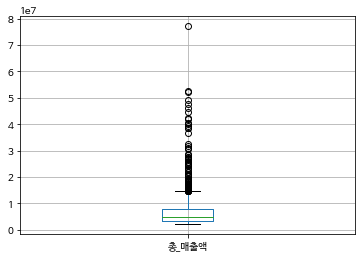

In [5]:
#총매출액 Boxplot
sp_sales.boxplot(column="총_매출액", return_type="both")

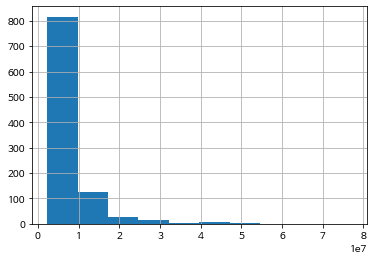

In [6]:
#총매출액 히스토그램
sp_sales["총_매출액"].hist()

In [7]:
#Q1, Q3, IQR 값 구하기
q1 = sp_sales["총_매출액"].quantile(q=0.25)
q3 = sp_sales["총_매출액"].quantile(q=0.75)
IQR = q3 - q1
IQR

4597005.0

In [8]:
#이상치 제거 데이터(수염상자 데이터)
data_IQR = sp_sales[(sp_sales["총_매출액"] < q3 + IQR*1.5) & (sp_sales["총_매출액"] > q1 - IQR*1.5)]
data_IQR

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


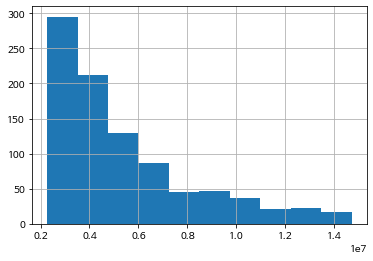

In [34]:
#수염상자 히스토그램
data_IQR["총_매출액"].hist()

#np.log1p(data_IQR["총_매출액"]).hist()

In [10]:
#이상치
data_outlier = sp_sales[(sp_sales["총_매출액"] > q3 + IQR*1.5)]
data_outlier

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
51,52,0,19283170,33,584338,1,3750,1,3,0,...,5,6,6,6,6,6,6,6,6,6
61,62,0,19067940,23,829041,28,376150,1,3,1,...,7,7,6,6,5,4,5,5,5,5
64,65,0,25789080,39,661258,8,261200,1,3,0,...,5,6,6,5,6,7,7,6,6,6
85,86,0,17404230,23,756706,22,351245,2,3,1,...,6,7,7,6,5,3,5,7,6,7
86,87,0,15403150,80,192539,23,379200,1,2,0,...,7,7,6,7,6,5,5,6,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,941,0,40089630,114,351663,12,323900,1,2,0,...,6,5,5,6,5,5,4,5,5,5
946,947,0,18224960,32,569530,15,325100,1,3,1,...,5,7,6,7,6,5,5,6,6,6
955,956,0,27573710,37,745235,1,5445,1,3,0,...,6,7,6,6,6,4,4,6,6,6
960,961,0,16855820,83,203082,14,333600,1,2,1,...,7,6,6,6,7,6,5,6,5,5


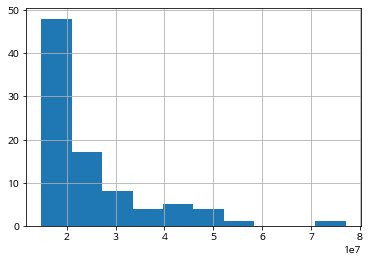

In [11]:
#이상치 히스토그램
data_outlier["총_매출액"].hist()

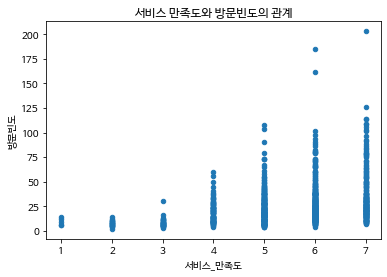

In [35]:
#산점도 그려보기
#x=서비스_만족도, y=방문빈도
%matplotlib inline
sp_sales.plot.scatter(x="서비스_만족도", y="방문빈도", title="서비스 만족도와 방문빈도의 관계")

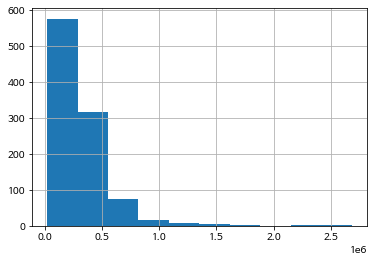

In [36]:
sp_sales["1회_평균매출액"].hist()

In [38]:
import math
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from scipy.stats import boxcox

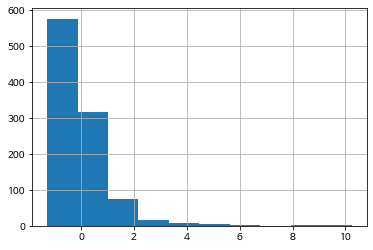

In [44]:
#1회_평균매출액 정규화(.preprocessing.scale)
sp_sales["1회_평균매출액_scale"] = preprocessing.scale(sp_sales["1회_평균매출액"])
sp_sales["1회_평균매출액_scale"].hist()

#x축 범위= -0.?? ~ 10.?? 
#0~1사이 범위에 데이터가 너무 빽빽하게 있어 분포를 알기 어려울때 사용

In [45]:
sp_sales.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       '1회_평균매출액_scale', '1회_평균매출액_scale_1'],
      dtype='object')

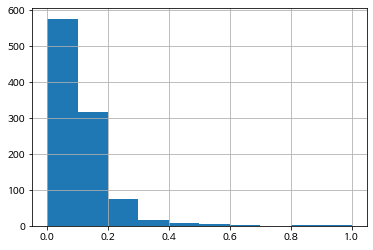

In [48]:
#1회_평균매출액 정규화(.MinMaxScaler & .fit_transform)
scaler = MinMaxScaler()
sp_minmax = scaler.fit_transform(sp_sales)
sp_minmax
sp_minmax = pd.DataFrame(sp_minmax)
sp_sales["1회_평균매출액_minmax"] = sp_minmax[4]
sp_sales["1회_평균매출액_minmax"].hist()

#x축 범위= 0~1

In [49]:
sp_sales.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       '1회_평균매출액_scale', '1회_평균매출액_scale_1', '1회_평균매출액_minmax'],
      dtype='object')

In [54]:
#원하는 열만 x로 추출해서 정규화
x = sp_sales[["총_매출액", "고객등급", "구매유형"]]
scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(x)
x_minmax = pd.DataFrame(x_minmax)
x_minmax

,0,1,2
0,0.023198,0.0,1.000000
1,0.011986,1.0,1.000000
2,0.005467,0.0,1.000000
3,0.049128,0.0,1.000000
4,0.153399,0.0,0.333333
...,...,...,...
995,0.038279,0.0,0.666667
996,0.107539,0.0,0.333333
997,0.006276,1.0,1.000000
998,0.120284,0.0,0.666667


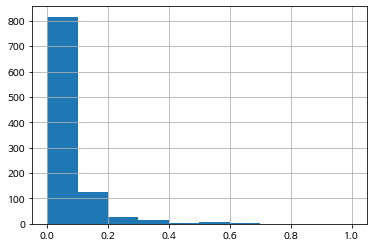

In [55]:
#인덱스_0(총매출액)의 히스토그램
x_minmax[0].hist()

In [71]:
#x로 열 추출해서 정규화한 데이터 합치기
x_scale = sp_sales[["1회_평균매출액","방문빈도", "할인권_사용 횟수"]]
x_noscale = sp_sales[["총_매출액","이탈여부"]]

scale = MinMaxScaler()
x_scale_minmax = scaler.fit_transform(x_scale)
x_scale_minmax = pd.DataFrame(x_scale_minmax)
x_scale_minmax

#scale적용 X
x_noscale_minmax = scaler.fit_transform(x_noscale)
x_noscale_minmax = pd.DataFrame(x_noscale_minmax)
x_noscale_minmax

,0,1
0,0.023198,0.0
1,0.011986,1.0
2,0.005467,0.0
3,0.049128,0.0
4,0.153399,0.0
...,...,...
995,0.038279,0.0
996,0.107539,0.0
997,0.006276,0.0
998,0.120284,0.0


In [73]:
x = pd.concat([x_scale_minmax, x_noscale_minmax], axis = 1)
x.columns =["1회_평균매출액","방문빈도", "할인권_사용 횟수","총_매출액","이탈여부"]
x

,1회_평균매출액,방문빈도,할인권_사용 횟수,총_매출액,이탈여부
0,0.080240,0.074627,0.000000,0.023198,0.0
1,0.076705,0.059701,0.724138,0.011986,1.0
2,0.047588,0.079602,0.172414,0.005467,0.0
3,0.123169,0.074627,0.000000,0.049128,0.0
4,0.062401,0.353234,0.275862,0.153399,0.0
...,...,...,...,...,...
995,0.233073,0.029851,0.068966,0.038279,0.0
996,0.070763,0.233831,0.172414,0.107539,0.0
997,0.094696,0.039801,0.241379,0.006276,0.0
998,0.274230,0.064677,0.655172,0.120284,0.0


In [96]:
#T-test
from scipy import stats

In [97]:
#단일표본 T-test

#1회_평균매출액의 모평균
print(sp_sales["1회_평균매출액"].mean())

#Test(1)
#귀무가설: x바 = 310,000
#대립가설: x바 /= 310,000
print(stats.ttest_1samp(sp_sales["1회_평균매출액"], 310000))
#결과값
#pvalue= 0.313 (>0.05)
#귀무가설 채택(x바 = 310,000)

#Test(2)
#귀무가설: x바 = 80,000
#대립가설: x바 /= 80,000
print(stats.ttest_1samp(sp_sales["1회_평균매출액"], 80000))
#결과값
#pvalue= 1.371e-15 (<0.05)
#대립가설 채택(x바 /= 80,000)

317361.141
Ttest_1sampResult(statistic=1.0075244541181163, pvalue=0.31392677941157715)
Ttest_1sampResult(statistic=32.4877833497386, pvalue=1.3713483140317845e-158)


In [98]:
#독립표본 T-test

male = sp_sales[sp_sales["성별"]==0]
male
female = sp_sales[sp_sales["성별"]==1]
female

#male, female의 총할인금액 모평균
print(male["총_할인_금액"].mean())
print(female["총_할인_금액"].mean())

#귀무가설: male 총할인금액 평균 = female 총할인금액 평균
#대립가설: male 총할인금액 평균 /= female 총할인금액 평균
print(stats.ttest_ind(male["총_할인_금액"], female["총_할인_금액"], equal_var=False))

#결과값
#pvalue= 0.813 (>0.05)
#귀무가설 채택(male 총할인금액 평균 = female 총할인금액 평균)


290337.11409395974
292727.8965922444
Ttest_indResult(statistic=-0.2356802623849098, pvalue=0.8139218415181008)


In [99]:
#ANOVA
!pip install pingouin
!pip install scikit_posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
import pingouin as pg
import scikit_posthocs
import scipy as sp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [101]:
sp_sales.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       '1회_평균매출액_scale', '1회_평균매출액_scale_1', '1회_평균매출액_minmax'],
      dtype='object')

In [102]:
#ANOVA

sp_sales["거주지역"].describe()
#min=1, max=7 (데이터는 1~7 범위)

count    1000.000000
mean        5.147000
std         1.169084
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         7.000000
Name: 거주지역, dtype: float64

In [121]:
#거주지역별 각 변수(열)의 평균
sp_sales.groupby("거주지역").mean()["총_할인_금액"]

거주지역
1   350960.0000
2   308104.3750
3   292584.2500
4   286002.8763
5   288312.9552
6   294494.1103
7   304651.5678
Name: 총_할인_금액, dtype: float64

In [122]:
#귀무가설: 등분산이다.
#대립가설: 등분산이 아니다.

sp_sales_anova = sp_sales[["거주지역", "총_할인_금액"]]
pd.options.display.float_format = '{:.4f}'.format #결과값 소숫점을 4째자리까지

type1 = []
for i in range(1,8,1): #7개의 집단 평균비교(#1,2,3,4,5,6,7)
    type1.append(sp_sales_anova[sp_sales_anova.거주지역==i].총_할인_금액)
sp.stats.levene(type1[0],type1[1],type1[2],type1[3],type1[4],type1[5],type1[6])

#결과값
#pvalue= 0.691 (>0.05)
#귀무가설 채택 -> '등분산이다'

LeveneResult(statistic=0.6478316449288941, pvalue=0.6919370796154418)

In [ ]:
#등분산인 경우

#귀무가설: 각 거주지역 별로 총할인금액의 평균이 같다. 
#대립가설: 각 거주지역 별로 총할인금액의 평균이 다르다. 
#sp_sales_anova["거주지역"] = sp_sales_anova["거주지역"].astype("int")
#sp_sales_anova["총_할인_금액"] = sp_sales_anova["총_할인_금액"].astype("float")
#formula = '총_할인_금액 ~ 거주지역'
#lm = ols(formula, sp_sales_anova).fit()
#print(anova_lm(lm))

model = ols("총_할인_금액 ~ 거주지역", data = sp_sales_anova).fit()
anova_lm(model)

In [134]:
sp_sales_anova.dtypes

거주지역         int64
총_할인_금액    float64
dtype: object

In [127]:
#등분산이 아닌 경우

pg.welch_anova(dv="총_할인_금액", between="거주지역", data=sp_sales)


,Source,ddof1,ddof2,F,p-unc,np2
0,거주지역,6,43.8092,4.5649,0.0011,0.0040
